# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

# No of Shares


In [4]:
no_of_shares = 1000

#Live stock price 
price = yf.Ticker('MGL.NS')
print("MGL")
print("--------")
price_MGL = price.history().tail(1)['Close'].iloc[0]
price_MGL

MGL
--------


871.9500122070312

# Investment value

In [5]:
value = price_MGL * no_of_shares
# Risk Free rate of US treasury bill
rfr = 0.06
#Volatility of Amazon
vol = 0.30

# Number of simulation 50,000

In [12]:
simulate = 50000
#Investment time in year 
time = 127/252

# Exapmle of np.random.standard_normal function


(array([1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 7.000e+00, 4.000e+00, 1.400e+01, 1.200e+01, 2.100e+01,
        1.400e+01, 2.400e+01, 3.400e+01, 3.600e+01, 4.500e+01, 4.500e+01,
        6.700e+01, 7.200e+01, 1.050e+02, 1.190e+02, 1.430e+02, 1.710e+02,
        1.960e+02, 2.160e+02, 2.910e+02, 3.000e+02, 3.790e+02, 4.140e+02,
        4.860e+02, 5.360e+02, 6.330e+02, 6.730e+02, 7.500e+02, 7.890e+02,
        8.780e+02, 1.001e+03, 1.050e+03, 1.111e+03, 1.160e+03, 1.250e+03,
        1.378e+03, 1.314e+03, 1.415e+03, 1.491e+03, 1.511e+03, 1.535e+03,
        1.587e+03, 1.621e+03, 1.593e+03, 1.555e+03, 1.636e+03, 1.487e+03,
        1.556e+03, 1.398e+03, 1.398e+03, 1.404e+03, 1.297e+03, 1.191e+03,
        1.124e+03, 1.023e+03, 9.620e+02, 8.750e+02, 8.170e+02, 7.950e+02,
        6.570e+02, 5.840e+02, 5.060e+02, 4.770e+02, 4.230e+02, 3.390e+02,
        2.980e+02, 2.990e+02, 2.190e+02, 2.160e+02, 1.890e+02, 1.450e+02,
        1.190e+02, 1.160e+02, 8.100e+0

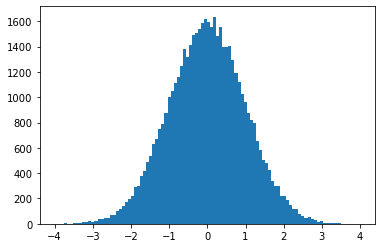

In [7]:
sample = np.random.standard_normal(simulate)
plt.hist(sample,bins  =100)

In [8]:
print(np.mean(sample))
print(np.std(sample))

-0.00546068456189866
0.9976707758904213


# Create a function to calculae VAR(Value at Risk)

In [9]:
def VaR(pv,rfr,time,simulate,vol):
    end_value = pv * np.exp((rfr - 0.5 * vol **2)*time + np.random.standard_normal(simulate) * vol * np.sqrt(time))
    returns = end_value - pv
    return returns
#Apply VaR function to simulate the returns 
returns_MGL = VaR(value,rfr,time,simulate,vol)

# Explain string formatting

In [10]:
# Print  : VaR at x% confidence level
x = 0.9
y = 3455.248

print("VaR at {:.0%} confidence level: ${:,.0f}".format(x,y))

VaR at 90% confidence level: $3,455


# Plot the returns 

VaR at 90% confidence level: -203,718
VaR at 95% confidence level: -253,054
VaR at 99% confidence level: -336,951


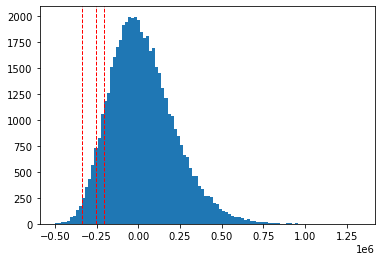

In [11]:
plt.hist(returns_MGL,bins =100);
#show VaR at 90%,95% and 99% confidence level
percentile = [10,5,1]

for i in percentile:
    confidence = (100-i)/100
    value = np.percentile(returns_MGL,i)
    print("VaR at {:.0%} confidence level: {:,.0f}".format(confidence,value))
    plt.axvline(value, color= 'red',linestyle='dashed',linewidth=1)
